In [ ]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling

retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

# Cleaning Data

In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

In [ ]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

# Data Cleansing menggunakan quantile ingat : IQR (Interquartile range)


In [ ]:
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 -Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal : ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 *  IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# print shape setelah dilakukan removing outliers
print('Shape akhir : ', retail_raw.shape)

## Tugas Praktek

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]


# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

Untuk mencek duplikasi data:
nama_dataframe.duplicate(subset=None)


Syntax untuk membuang duplikasi:
nama_dataframe.drop_duplicate()


In [ ]:
retail_raw.duplicated(subset=None)
retail_raw.drop_duplicates(inplace=True)

# CASE STUDY DATA PROFILLING

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())


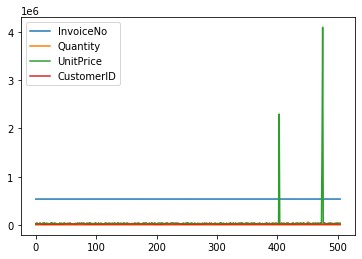

In [14]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()